In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()
# set_chinese_font()

# Data Input

In [2]:
data = []
for year in range(2008,2018):
    file = "./data/cn/movie_%s.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)

In [3]:
df = pd.DataFrame(data)
df.describe()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
count,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391
unique,715,407,581,507,367,1689,2370,71,2146,2369,2370,25
top,0.4%,25.9%,0.0%,0.0%,3.2%,,https://img3.doubanio.com/view/movie_poster_co...,5.9,57,我的诗篇,https://movie.douban.com/subject/25858760/,2015
freq,47,16,14,58,39,689,2,61,5,2,2,343


In [4]:
df.head()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
0,2.2%,24.4%,46.7%,17.8%,8.9%,tt0904013,https://img3.doubanio.com/view/movie_poster_co...,6.1,59,笨裁妙判 糊涂神判,https://movie.douban.com/subject/2596658/,2007
1,4.1%,18.4%,56.8%,17.1%,3.6%,tt1151318,https://img3.doubanio.com/view/movie_poster_co...,6.0,8730,错爱 塚愛,https://movie.douban.com/subject/2361528/,2007
2,6.4%,23.0%,49.1%,17.5%,4.1%,tt1606322,https://img3.doubanio.com/view/movie_poster_co...,5.8,2618,救我,https://movie.douban.com/subject/5155783/,2008
3,6.6%,10.1%,53.0%,21.7%,8.6%,,https://img1.doubanio.com/view/movie_poster_co...,6.3,291,欣月童话,https://movie.douban.com/subject/2277015/,2008
4,2.3%,11.2%,47.4%,31.6%,7.5%,tt0491044,https://img1.doubanio.com/view/movie_poster_co...,6.6,34533,文雀,https://movie.douban.com/subject/2976123/,2008


In [5]:
df.drop_duplicates('title', inplace=True)
df['rating'] = df['rating'].astype(float)
df['ratings_num'] = df['ratings_num'].astype(int)
df['1_star'] = df['1_star'].apply(lambda x: float(x.strip('%'))/100)
df['2_star'] = df['2_star'].apply(lambda x: float(x.strip('%'))/100)
df['3_star'] = df['3_star'].apply(lambda x: float(x.strip('%'))/100)
df['4_star'] = df['4_star'].apply(lambda x: float(x.strip('%'))/100)
df['5_star'] = df['5_star'].apply(lambda x: float(x.strip('%'))/100)

df.rename(columns={'title': 'name', 'rating': 'db_rating', 'ratings_num': 'db_ratings_count',   
                   'url': 'douban_url', 'img_url':'image_url', 'imdb_id': 'movie_tt_id'}, inplace=True)

In [6]:
def name_to_rating(name):
    return {
        '1_star': 2,
        '2_star': 4,
        '3_star': 6,
        '4_star': 8,
        '5_star': 10,
    }[name]

df['mode']=df[['1_star', '2_star','3_star','4_star','5_star']].idxmax(axis=1)
df['mode']=df['mode'].apply(lambda x: name_to_rating(x))

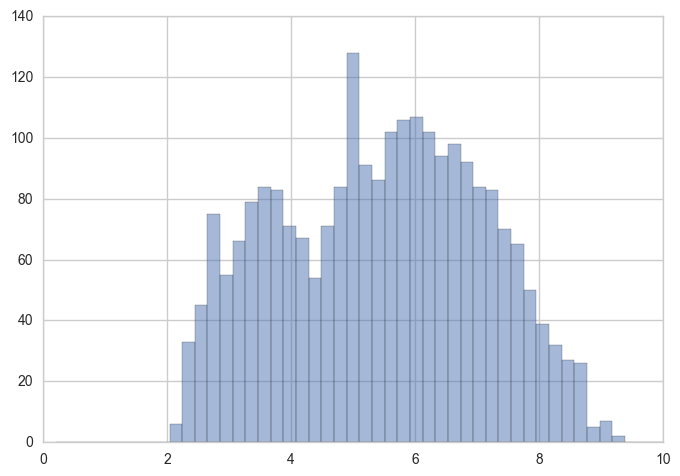

In [7]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5, label = 'douban')

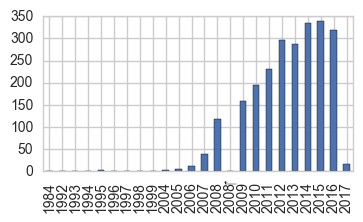

In [8]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

# General Analysis for Clean Data set

In [9]:
df = df.query("db_ratings_count > 5000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,mode
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,0.094546,0.155732,0.372132,0.261503,0.116092,6.297291,69874.108374,6.188834
std,0.144908,0.113726,0.133201,0.149582,0.114867,1.324009,84785.789062,1.807627
min,0.001000,0.003000,0.012000,0.004000,0.008000,2.300000,5005.000000,2.000000
25%,0.010000,0.050000,0.274000,0.130250,0.039000,5.400000,14161.000000,6.000000
50%,0.031000,0.135000,0.395000,0.252000,0.072500,6.400000,38063.000000,6.000000
75%,0.102750,0.250750,0.483000,0.401000,0.151000,7.300000,92069.000000,8.000000
max,0.942000,0.422000,0.619000,0.582000,0.676000,9.200000,709045.000000,10.000000


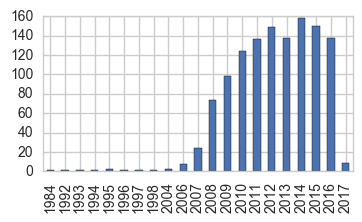

In [10]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

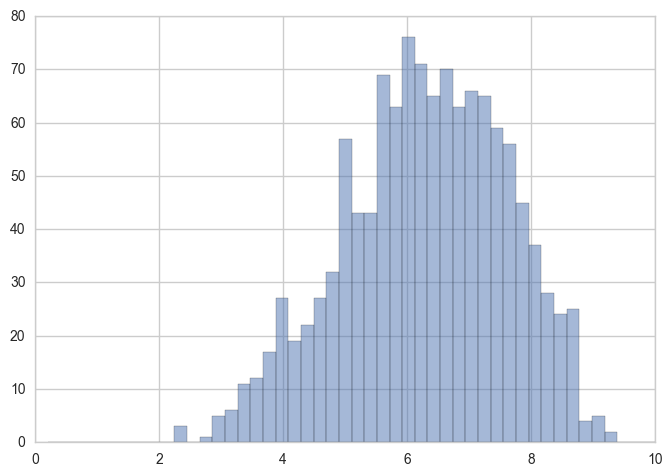

In [11]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5, label = 'douban')

In [12]:
df['std']=(df['1_star']*(2-df['db_rating'])**2+df['2_star']*(4-df['db_rating'])**2+df['3_star']*(6-df['db_rating'])**2+ \
df['4_star']*(8-df['db_rating'])**2+df['5_star']*(10-df['db_rating'])**2)**0.5

df['std2']=(df['1_star']*(2-df['mode'])**2+df['2_star']*(4-df['mode'])**2+df['3_star']*(6-df['mode'])**2+ \
df['4_star']*(8-df['mode'])**2+df['5_star']*(10-df['mode'])**2)**0.5

(1, 4)

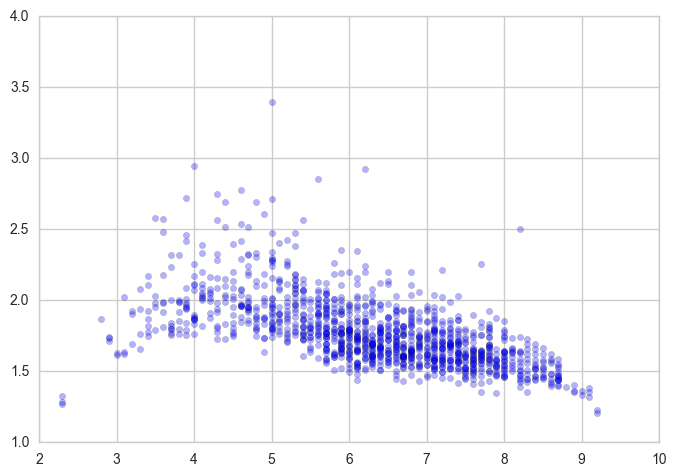

In [13]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.set_xlim([2,10])
ax.set_ylim([1,4])

In [14]:
turn_scatter_into_interactive(fig, scatter_plot, df, 'all.html', show_ratings_num=False)

In [15]:
movie_list(df.sort_values(by='std',ascending=False))

# Popular Moives

In [16]:
df = df.query("db_ratings_count > 20000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,mode,std,std2
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,0.064362,0.128336,0.366848,0.301069,0.139374,6.645431,101939.954315,6.624365,1.726592,1.869946
std,0.112856,0.107292,0.131166,0.144619,0.126499,1.239202,90496.468750,1.643134,0.210347,0.307154
min,0.001000,0.003000,0.021000,0.004000,0.009000,2.300000,20064.000000,2.000000,1.206715,1.320606
25%,0.007000,0.035000,0.265750,0.177000,0.049750,5.900000,39881.250000,6.000000,1.579274,1.666133
50%,0.020000,0.090000,0.385000,0.318000,0.094000,6.800000,70970.000000,6.000000,1.691153,1.815489
75%,0.067000,0.211250,0.476000,0.430000,0.187250,7.600000,130970.500000,8.000000,1.844288,1.985447
max,0.929000,0.400000,0.595000,0.569000,0.676000,9.200000,709045.000000,10.000000,2.689535,3.856423


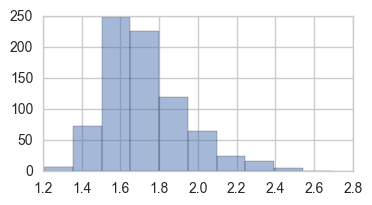

In [17]:
df['std'].hist(alpha=0.5, figsize=(4,2))

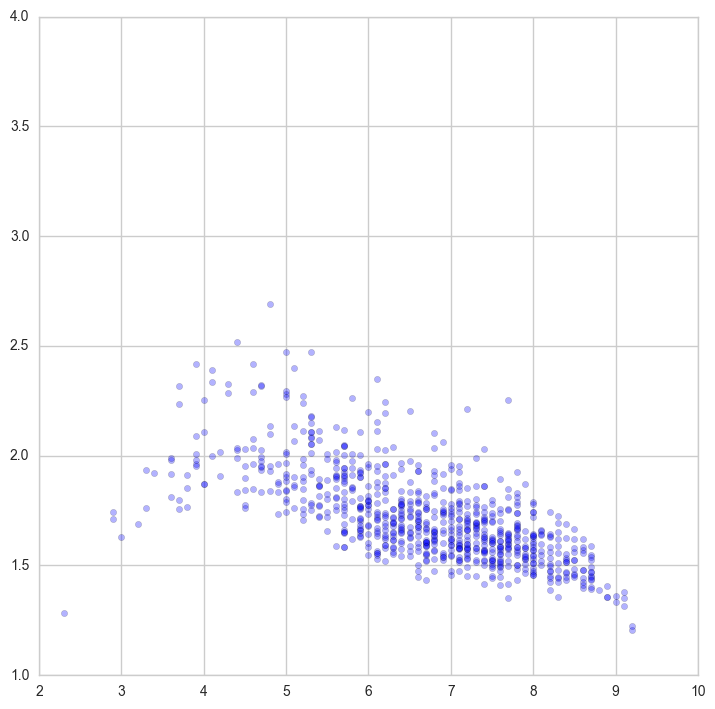

In [18]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.set_xlim([2,10])
ax.set_ylim([1,4])
turn_scatter_into_interactive(fig, scatter_plot, df, 'popular.html', show_ratings_num=False)

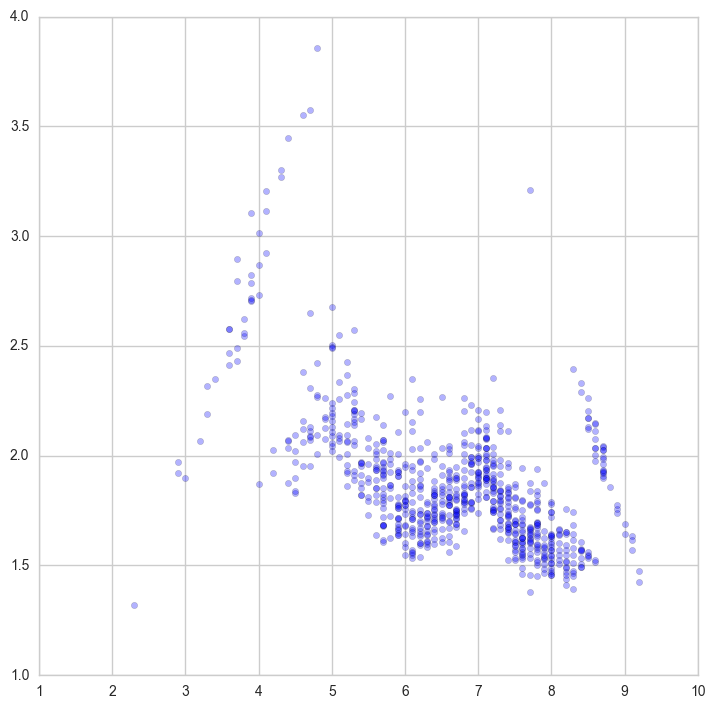

In [19]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std2'], alpha=0.3)
turn_scatter_into_interactive(fig, scatter_plot, df, 'popular_std2.html', show_ratings_num=False)

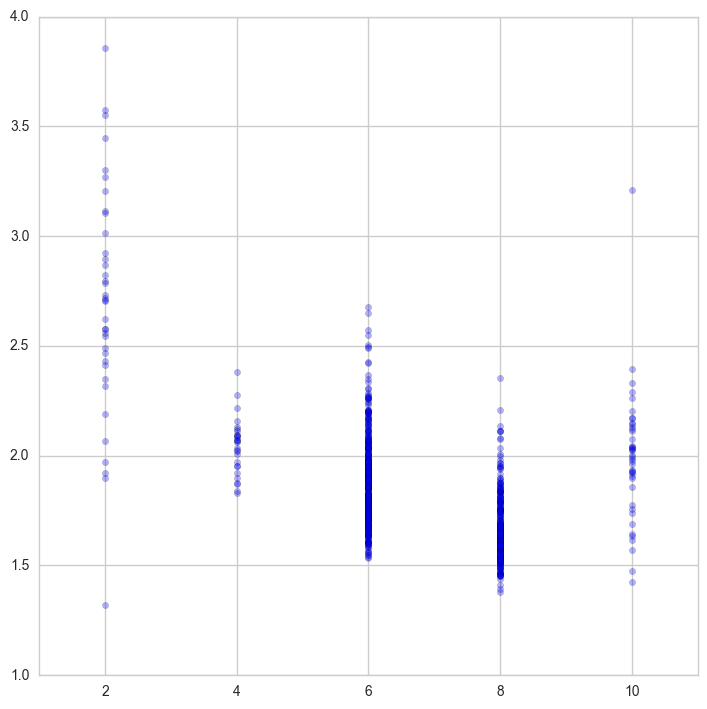

In [20]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['mode'], df['std2'], alpha=0.3)
turn_scatter_into_interactive(fig, scatter_plot, df, 'popular_std2_mode.html', show_ratings_num=False)

In [21]:
movie_list(df.sort_values(by='std',ascending=False), len=50)

In [22]:
# sub_df = df[df['name'].str.contains("西游")]
# movie_list(sub_df.sort_values(by='std',ascending=False))

In [23]:
from sklearn import datasets
dataset = datasets.load_iris()

In [24]:
df[['1_star','2_star','3_star','4_star','5_star']].as_matrix()

array([[ 0.023,  0.112,  0.474,  0.316,  0.075],
       [ 0.008,  0.065,  0.53 ,  0.331,  0.065],
       [ 0.141,  0.31 ,  0.423,  0.104,  0.022],
       ..., 
       [ 0.042,  0.084,  0.361,  0.367,  0.145],
       [ 0.084,  0.229,  0.437,  0.184,  0.066],
       [ 0.006,  0.018,  0.134,  0.362,  0.48 ]])

In [25]:
dataset.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4